## 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

While machine learning is a good tool for drawing insights and better understanding of patterns, predictions of future, and even possible causal events for specific situations and outcomes, it needs to be applied appropriately to be truly useful. Automated dashboards reporting on the current state of a business, or looking for outliers in weather data sensors are not machine learning appropriate, and too small a data set would not give enough grist for the calculations to properly ruminate on and give a solid answer. Questions need to be focused for the use of machine learning: looking at settlement patterns throughout time, where are the most likely places to find pre-historic villages (prediction); what sort of employment in the 19th century led to the greatest mortality rate for those under 18 in the U.S. (causal); how did mortuary goods vary between status-groups in Ancient Egypt over time (pattern)?  The data needs to be thoroughly understood for machine learning modelling, as well as cleaned up and standardized. Above all, though, it needs to be understood that machine learning is no more than a tool that gives a best educated guess based on the data it is fed – machine learning is less a time-travel device, and more a Magic 8-ball where the possibilities are limited, but certainly more than 1.

## 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.  

In [1]:
# importing pandas and numpylibraries
import pandas as pd
import numpy as np

loans_df= pd.read_csv("loans_full_schema.csv")
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [2]:
# Looking at the data stats to get things like row count
loans_df.describe()

#10,000 rows

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [3]:
# Getting NaN counts for each of the 55 columns
loans_df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

## Cleaning up Null Values - 0 Replacement

In [4]:
# Replacing NaN with 0 in 4 specific columns

# Based on the count of NaNs, and information type: these columns can have their NaN replaced by 0

# months_since_last_delinq         (5658) <--- it could be that there are no delinquincies with these folks
# months_since_90d_late            (7715) <--- again, it could be that there are no 90 days late situations for these people
# months_since_last_credit_inquiry (1271) <--- it could be that this was not on the credit inquery
# num_accounts_120d_past_due       (318)  <--- these could situations where there were no accounts, or it's key entry error

loans_df['months_since_last_delinq'] = loans_df['months_since_last_delinq'].fillna(0)
loans_df['months_since_90d_late'] = loans_df['months_since_90d_late'].fillna(0)
loans_df['months_since_last_credit_inquiry'] = loans_df['months_since_last_credit_inquiry'].fillna(0)
loans_df['num_accounts_120d_past_due'] = loans_df['num_accounts_120d_past_due'].fillna(0)

loans_df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq               0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late                  0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

## Cleaning up Null Values - Column Removal

In [5]:
# Removal of 4 columns due to their copious amount of NaNs - 85% of the rows

# with 10,000 entries in the data set, the 8500+ NaNs in these columns render the columns as unreliable to the body of data
# hence their removal

# annual_income_joint                 8505
# verification_income_joint           8545
# debt_to_income_joint                8505

loans_df = loans_df.drop(['annual_income_joint', 'verification_income_joint','debt_to_income_joint'], axis=1)
loans_df.isnull().sum()

emp_title                           833
emp_length                          817
state                                 0
homeownership                         0
annual_income                         0
verified_income                       0
debt_to_income                       24
delinq_2y                             0
months_since_last_delinq              0
earliest_credit_line                  0
inquiries_last_12m                    0
total_credit_lines                    0
open_credit_lines                     0
total_credit_limit                    0
total_credit_utilized                 0
num_collections_last_12m              0
num_historical_failed_to_pay          0
months_since_90d_late                 0
current_accounts_delinq               0
total_collection_amount_ever          0
current_installment_accounts          0
accounts_opened_24m                   0
months_since_last_credit_inquiry      0
num_satisfactory_accounts             0
num_accounts_120d_past_due            0


## Cleaning Up Null Values - Row Removal

In [6]:
# Removal of rows due to NaNs in vital columns

# Because data from these columns are vital, these ROWS with NaNs in them need to be removed

# emp_length                           817
# debt_to_income                        24

loans_df.dropna(subset = ["emp_length","debt_to_income"], inplace=True)

loans_df.isnull().sum()

emp_title                           16
emp_length                           0
state                                0
homeownership                        0
annual_income                        0
verified_income                      0
debt_to_income                       0
delinq_2y                            0
months_since_last_delinq             0
earliest_credit_line                 0
inquiries_last_12m                   0
total_credit_lines                   0
open_credit_lines                    0
total_credit_limit                   0
total_credit_utilized                0
num_collections_last_12m             0
num_historical_failed_to_pay         0
months_since_90d_late                0
current_accounts_delinq              0
total_collection_amount_ever         0
current_installment_accounts         0
accounts_opened_24m                  0
months_since_last_credit_inquiry     0
num_satisfactory_accounts            0
num_accounts_120d_past_due           0
num_accounts_30d_past_due

## Deal with Multicollinearity - Remove Statistically Unneccessary Column

In [7]:
# Removal of unneccessary column

# This column is just not needed, and it still has NaN

# emp_title (16)

loans_df = loans_df.drop(['emp_title'], axis=1)
loans_df.isnull().sum()

emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
months_since_90d_late               0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_

In [ ]:
# verified_income        see below/onehot     object - Source Verified, Not Verified, Verified

# sub_grade              remove column        object - A 1-5 to G 1_5 <--- useless for analysis purpose
# issue_month            remove column        object - Mar-2018, Jan-2018, Feb-2018  <--- date should not affect payback

# state                  categorical encode   object - state 2-letter initials
# loan_purpose           categorical encode   object - debt_consolidation, credit_card, other, home_improvement, major_purchase,
#                                                    - house, medical, small_business, car, moving, vacation, renewable energy
# grade                  categorical encode   object - A, B, C, D, E, F, G

# homeownership          one-hot              object - MORTGAGE, RENT, OWN
# application_type       one-hot              object - individual, joint
# loan_status            one-hot              object - Current, Fully Paid, In Grace Period, Late (31-120 days), 
#                                                      Late (16 to 30 days), Charged Off
# initial_listing_status one-hot              object - whole, fractional
# disbursement_method    one-hot              object - Cash, DirectPay

## Standardization/Normalization - Changing Values to Match Type

In [8]:
# Standardization

# verified_income  -  object - Source Verified, Not Verified, Verified

# replace "Source Verfied" with "Verified" 

loans_df['verified_income'] = loans_df['verified_income'].replace('Source Verified', 'Verified')

print(loans_df['verified_income'])

0           Verified
1       Not Verified
2           Verified
3       Not Verified
4           Verified
            ...     
9995        Verified
9996        Verified
9997        Verified
9998        Verified
9999    Not Verified
Name: verified_income, Length: 9182, dtype: object


## Deal with Multicollinearity - Removal of Statistically Unceccesary Columns

In [9]:
# Removal of two columns as that they should not be needed for statistics

# sub_grade              remove column        object - A 1-5 to G 1_5 <--- useless for analysis purpose
# issue_month            remove column        object - Mar-2018, Jan-2018, Feb-2018  <--- date should not affect payback

loans_df = loans_df.drop(['sub_grade', 'issue_month'], axis=1)
loans_df.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,...,installment,grade,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,6,...,652.53,C,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,HI,RENT,40000.0,Not Verified,5.04,0,0.0,1996,1,...,167.54,C,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3.0,WI,RENT,40000.0,Verified,21.15,0,28.0,2006,4,...,71.40,D,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,1.0,PA,RENT,30000.0,Not Verified,10.16,0,0.0,2007,0,...,664.19,A,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,CA,RENT,35000.0,Verified,57.96,0,0.0,2008,7,...,786.87,C,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


## Categorical Encoding

In [10]:
# Categorical Encoding - 3 columns - state, loan purpose, and grade shouldn't affect ability to repay a loan
# Removal of original columns for state, loan purpose and grade

# state                  categorical encode   object - state 2-letter initials
# loan_purpose           categorical encode   object - debt_consolidation, credit_card, other, home_improvement, major_purchase,
#                                                    - house, medical, small_business, car, moving, vacation, renewable energy
# grade                  categorical encode   object - A, B, C, D, E, F, G

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column 
loans_df['state_code'] = labelencoder.fit_transform(loans_df['state'])
loans_df['loan_purpose_code'] = labelencoder.fit_transform(loans_df['loan_purpose'])
loans_df['grade_code'] = labelencoder.fit_transform(loans_df['grade'])
loans_clean_df = loans_df.drop(['state', 'loan_purpose', 'grade'], axis=1)

loans_clean_df.head() 

,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,state_code,loan_purpose_code,grade_code
0,3.0,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,6,28,...,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,30,7,2
1,10.0,RENT,40000.0,Not Verified,5.04,0,0.0,1996,1,30,...,whole,Cash,4651.37,499.12,348.63,150.49,0.0,11,2,2
2,3.0,RENT,40000.0,Verified,21.15,0,28.0,2006,4,31,...,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,47,8,3
3,1.0,RENT,30000.0,Not Verified,10.16,0,0.0,2007,0,4,...,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,37,2,0
4,10.0,RENT,35000.0,Verified,57.96,0,0.0,2008,7,22,...,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,4,1,2


## One-Hot Encoding

In [11]:
# One-hot Encoding - 5 columns - creation of new columns, and removal of originals

# homeownership          one-hot              object - MORTGAGE, RENT, OWN
# application_type       one-hot              object - individual, joint
# loan_status            one-hot              object - Current, Fully Paid, In Grace Period, Late (31-120 days), 
#                                                      Late (16 to 30 days), Charged Off
# initial_listing_status one-hot              object - whole, fractional
# disbursement_method    one-hot              object - Cash, DirectPay

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded =  pd.get_dummies(loans_clean_df, columns=['verified_income',
                                                     'homeownership', 
                                                     'application_type', 
                                                     'loan_status',
                                                     'initial_listing_status',
                                                     'disbursement_method'], prefix='OH')
one_hot_encoded.head()

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,OH_Charged Off,OH_Current,OH_Fully Paid,OH_In Grace Period,OH_Late (16-30 days),OH_Late (31-120 days),OH_fractional,OH_whole,OH_Cash,OH_DirectPay
0,3.0,90000.0,18.01,0,38.0,2001,6,28,10,70795,...,0,1,0,0,0,0,0,1,1,0
1,10.0,40000.0,5.04,0,0.0,1996,1,30,14,28800,...,0,1,0,0,0,0,0,1,1,0
2,3.0,40000.0,21.15,0,28.0,2006,4,31,10,24193,...,0,1,0,0,0,0,1,0,1,0
3,1.0,30000.0,10.16,0,0.0,2007,0,4,4,25400,...,0,1,0,0,0,0,0,1,1,0
4,10.0,35000.0,57.96,0,0.0,2008,7,22,16,69839,...,0,1,0,0,0,0,0,1,1,0


In [12]:
one_hot_encoded.describe()

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,OH_Charged Off,OH_Current,OH_Fully Paid,OH_In Grace Period,OH_Late (16-30 days),OH_Late (31-120 days),OH_fractional,OH_whole,OH_Cash,OH_DirectPay
count,9182.000000,9.182000e+03,9182.000000,9182.000000,9182.000000,9182.000000,9182.000000,9182.000000,9182.000000,9.182000e+03,...,9182.000000,9182.000000,9182.000000,9182.000000,9182.000000,9182.000000,9182.000000,9182.000000,9182.000000,9182.000000
mean,5.930625,8.218834e+04,18.986717,0.218580,15.928229,2001.659116,1.982901,22.837726,11.508713,1.887259e+05,...,0.000653,0.936397,0.045742,0.006861,0.003921,0.006426,0.176650,0.823350,0.927249,0.072751
std,3.703809,6.591019e+04,14.194584,0.695287,23.119772,7.448484,2.383235,11.909354,5.886325,1.905468e+05,...,0.025556,0.244057,0.208936,0.082553,0.062496,0.079906,0.381393,0.381393,0.259742,0.259742
min,0.000000,3.000000e+03,0.000000,0.000000,0.000000,1963.000000,0.000000,2.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.850225e+04,11.012500,0.000000,0.000000,1998.000000,0.000000,14.000000,7.000000,5.366850e+04,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,6.000000,6.800000e+04,17.430000,0.000000,0.000000,2003.000000,1.000000,21.000000,10.000000,1.201480e+05,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,10.000000,9.893200e+04,24.760000,0.000000,29.000000,2006.000000,3.000000,30.000000,15.000000,2.737380e+05,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,10.000000,2.300000e+06,469.090000,13.000000,118.000000,2015.000000,26.000000,87.000000,51.000000,3.386034e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

Columns need to be limited to make the heatmap matrix readable, requiring the original 60 columns to be slimmed down to 10 by using quartile statistics for selection. Loan amount, installments, and balance had very strong to strong correlations, ranging from 0.86 to 0.94; this would strongly imply that a large loan with very sizable installment payments would be more difficult to pay, especially as that the balance of the loan would be much higher at the start. Annual income, total credit limit, and total credit utilized have a moderate influence with a range of 0.51 to 0.52; this can be used as a caution flag as that though someone may have a high annual income, and a high credit limit, if they have utilized most of that limit, there may be a question of the borrower’s ability to repay.  Years of employment had little correlation to anything save the barest of one (0.15) to the credit limit available to the borrower. Annual income did have a weak correlation to the total credit the borrower had already used (0.39), loan amounts given (0.32), and the installments (0.31). Interest rates were slightly influenced by the term at a correlation of 0.37, which makes me wonder what does factor into the interest rate charged on loans, because although the correlation is minimal, interest rates do affect the balance of the loan, which in turn affects the term, which in turn affects the installments and the ability to repay the loan.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = one_hot_encoded.corr()

corrMatrix

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,OH_Charged Off,OH_Current,OH_Fully Paid,OH_In Grace Period,OH_Late (16-30 days),OH_Late (31-120 days),OH_fractional,OH_whole,OH_Cash,OH_DirectPay
emp_length,1.000000,0.096373,0.026157,0.008215,0.042614,-0.234390,0.003790,0.133539,0.067500,0.147674,...,0.000479,0.002348,-0.000262,0.009038,-0.014353,-0.004750,-0.021241,0.021241,0.032908,-0.032908
annual_income,0.096373,1.000000,-0.176662,0.051920,0.034010,-0.194632,0.087653,0.204255,0.167835,0.512529,...,0.002118,-0.024215,0.022819,0.017045,-0.002913,-0.001718,-0.048141,0.048141,-0.011007,0.011007
debt_to_income,0.026157,-0.176662,1.000000,-0.028352,-0.011856,-0.076767,0.034891,0.215238,0.231042,0.081412,...,0.001309,0.027511,-0.025347,0.003230,-0.005690,-0.017056,0.017983,-0.017983,-0.015750,0.015750
delinq_2y,0.008215,0.051920,-0.028352,1.000000,-0.044422,-0.084797,0.002584,0.067423,0.009661,0.055394,...,-0.008039,-0.004076,0.000147,0.009924,0.007849,-0.001757,0.034693,-0.034693,0.025941,-0.025941
months_since_last_delinq,0.042614,0.034010,-0.011856,-0.044422,1.000000,-0.104910,0.072648,0.110437,0.042020,0.025073,...,-0.005267,0.015329,-0.009557,-0.005506,-0.001991,-0.012898,0.024574,-0.024574,0.008344,-0.008344
earliest_credit_line,-0.234390,-0.194632,-0.076767,-0.084797,-0.104910,1.000000,0.035726,-0.313460,-0.191390,-0.260794,...,-0.001691,0.003830,-0.007547,-0.008064,0.008253,0.010452,0.030708,-0.030708,-0.010118,0.010118
inquiries_last_12m,0.003790,0.087653,0.034891,0.002584,0.072648,0.035726,1.000000,0.207326,0.186768,0.126156,...,0.000183,-0.033892,0.023664,0.021634,0.018001,0.005153,0.031484,-0.031484,0.018753,-0.018753
total_credit_lines,0.133539,0.204255,0.215238,0.067423,0.110437,-0.313460,0.207326,1.000000,0.755008,0.388813,...,0.004643,-0.015431,0.031086,0.008223,-0.020804,-0.027862,-0.033807,0.033807,-0.022514,0.022514
open_credit_lines,0.067500,0.167835,0.231042,0.009661,0.042020,-0.191390,0.186768,0.755008,1.000000,0.324815,...,0.002858,0.015170,-0.004309,0.002679,-0.012824,-0.028718,-0.012572,0.012572,-0.047957,0.047957
total_credit_limit,0.147674,0.512529,0.081412,0.055394,0.025073,-0.260794,0.126156,0.388813,0.324815,1.000000,...,0.019411,-0.018819,0.027725,-0.004810,0.007435,-0.022068,-0.050400,0.050400,-0.022512,0.022512


In [14]:
# Hunt down outliers

Q1 = one_hot_encoded.quantile(0.25)
Q3 = one_hot_encoded.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

emp_length                               8.0000
annual_income                        50429.7500
debt_to_income                          13.7475
delinq_2y                                0.0000
months_since_last_delinq                29.0000
earliest_credit_line                     8.0000
inquiries_last_12m                       3.0000
total_credit_lines                      16.0000
open_credit_lines                        8.0000
total_credit_limit                  220069.5000
total_credit_utilized                47238.5000
num_collections_last_12m                 0.0000
num_historical_failed_to_pay             0.0000
months_since_90d_late                    0.0000
current_accounts_delinq                  0.0000
total_collection_amount_ever             0.0000
current_installment_accounts             2.0000
accounts_opened_24m                      4.0000
months_since_last_credit_inquiry         9.0000
num_satisfactory_accounts                8.0000
num_accounts_120d_past_due              

In [15]:
corr_df = one_hot_encoded[['emp_length',
                           'annual_income',
                           'debt_to_income',
                           'total_credit_limit',
                           'total_credit_utilized',
                           'loan_amount',
                           'term',
                           'interest_rate',
                           'installment',
                           'balance']].copy()

corr_df                       

,emp_length,annual_income,debt_to_income,total_credit_limit,total_credit_utilized,loan_amount,term,interest_rate,installment,balance
0,3.0,90000.0,18.01,70795,38767,28000,60,14.07,652.53,27015.86
1,10.0,40000.0,5.04,28800,4321,5000,36,12.61,167.54,4651.37
2,3.0,40000.0,21.15,24193,16000,2000,36,17.09,71.40,1824.63
3,1.0,30000.0,10.16,25400,4997,21600,36,6.72,664.19,18853.26
4,10.0,35000.0,57.96,69839,52722,23000,36,14.07,786.87,21430.15
...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,199195,77963,24000,36,7.35,744.90,21586.34
9996,8.0,121000.0,32.38,382061,101571,10000,36,19.03,366.72,9147.44
9997,10.0,67000.0,45.26,346402,95421,30000,36,23.88,1175.10,27617.65
9998,1.0,80000.0,11.99,294475,27641,24000,36,5.32,722.76,21518.12


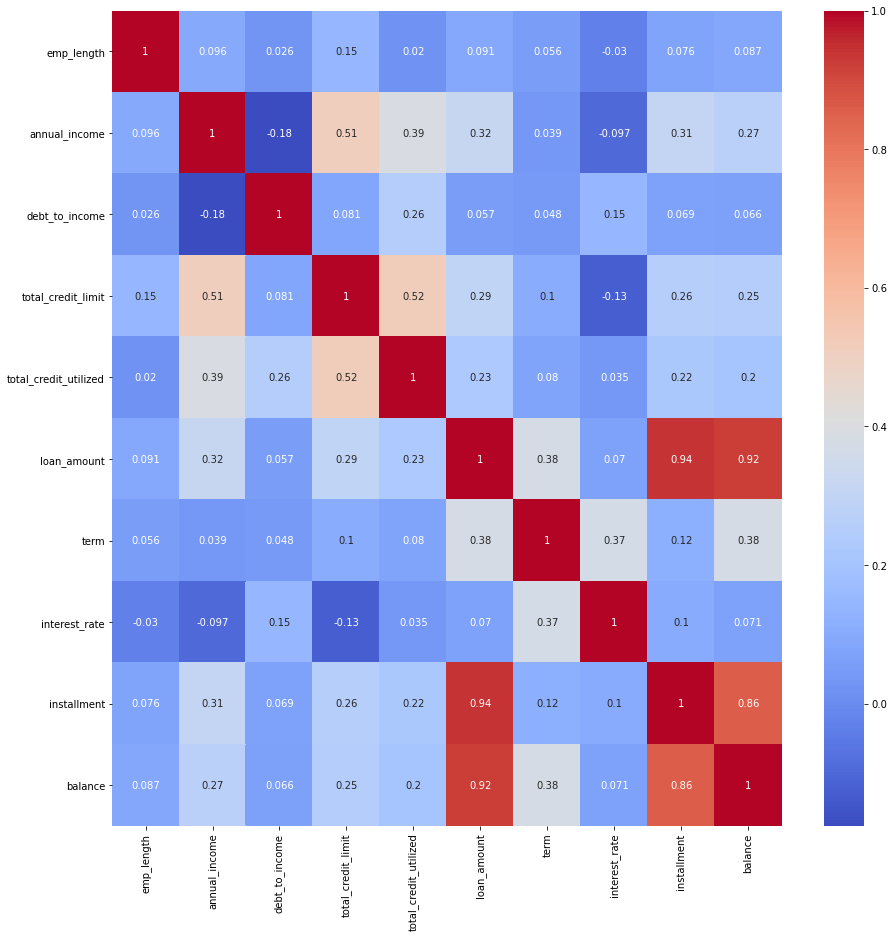

In [16]:
# notes for myself
# 0.9 to 1.0 positive or negative indicates a very strong correlation.
# 0.7 to 0.9 positive or negative indicates a strong correlation.
# 0.5 to 0.7 positive or negative indicates a moderate correlation.
# 0.3 to 0.5 positive or negative indicates a weak correlation.
# 0.0 to 0.3 positive or negative indicates a negligible correlation.

corrMatrix = corr_df.corr()

corrMatrix

fig = plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, annot=True,cmap="coolwarm")
plt.show()

## 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

### A bin size of 89 was chosen because 89 different loan amounts were being offered between 1,000 and 40,000, and I wanted to see if there was a detailed pattern in the amounts being loaned. 

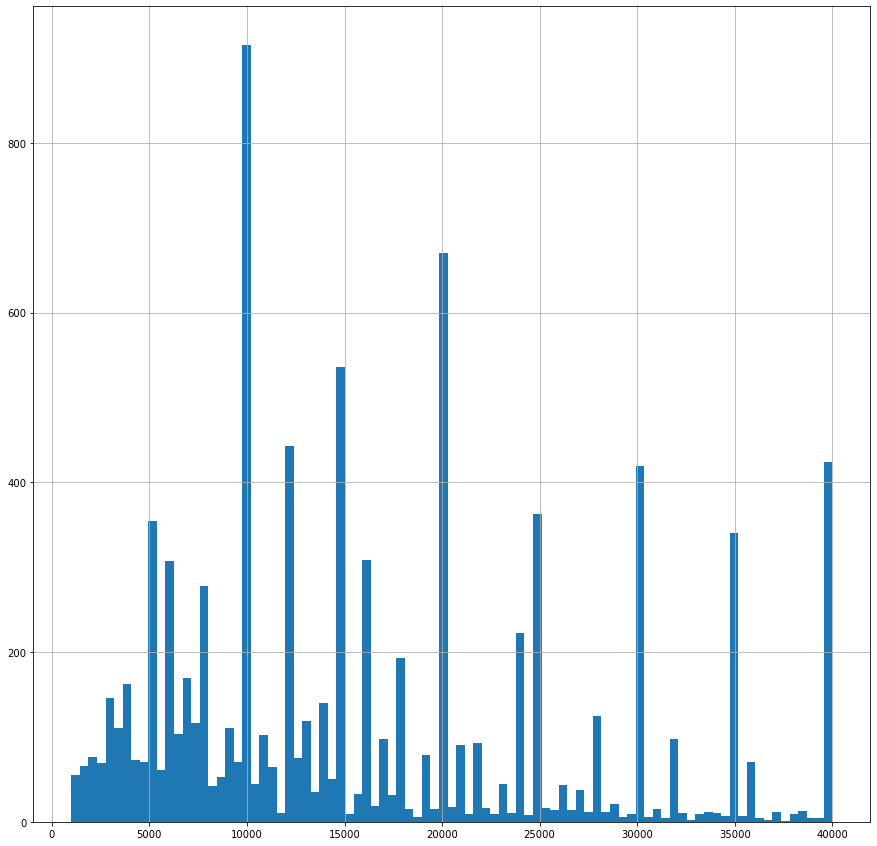

In [17]:
# Minimum loan is $1,000  
# Maximum loan is $40,000
# Incriments are varried
# 89 different loan amounts 

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
one_hot_encoded['loan_amount'].hist(bins = 89)

plt.show()


## 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 
## * a.	Is there a better way to do this than with a lambda? 
## * b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

### No loans given in Iowa

In [18]:
# Needed this so I knew what state was coded with which number

state_coding = loans_df[['state','state_code']].copy()
state_coding = state_coding.drop_duplicates(subset=None, keep='first', inplace=False)
state_coding = state_coding.sort_values('state_code')
state_coding

,state,state_code
294,AK,0
111,AL,1
32,AR,2
7,AZ,3
4,CA,4
13,CO,5
234,CT,6
827,DC,7
303,DE,8
11,FL,9


In [35]:
# Midwest    (8) = IA, IL, IN, MI, MN, MO, OH, WI
Midwest =             [13, 14, 21, 22, 23, 34, 47]

# Northeast (10) = CT, DC, DE, MA, ME, NH, NJ, NY, PA, RI, VT
Northeast =       [6, 7, 8, 18, 20, 29, 30, 33, 37, 38, 45]

# Pacific    (9) = AK, AZ, CA, HI, ID, NV, OR, UT, WA
Pacific =         [0, 3, 4, 11, 12, 32, 36, 43, 46]

# Plains     (9) = CO, KS, MT, ND, NE, NM, OK, SD, WY
Plains =           [5, 15, 25, 27, 28, 31, 35, 40, 49]

# South     (14) = AL, AR, FL, GA, KY, LA, MD, MS, NC, SC, TN, TX, VA, WV
South =           [1, 2, 9, 10, 16, 17, 19, 24, 26, 39, 41, 42, 44, 48]

def reg_func(x):
    if x in Midwest:
        return 'Midwest'
    elif x in Northeast:
        return 'Northeast'
    elif x in Pacific:
        return 'Pacific'
    elif x in Plains:
        return 'Plains'
    elif x in South:
        return 'South'
    else:
        'Did not work'

one_hot_encoded['region'] = one_hot_encoded['state_code'].apply(reg_func)

one_hot_encoded

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,OH_Current,OH_Fully Paid,OH_In Grace Period,OH_Late (16-30 days),OH_Late (31-120 days),OH_fractional,OH_whole,OH_Cash,OH_DirectPay,region
0,3.0,90000.0,18.01,0,38.0,2001,6,28,10,70795,...,1,0,0,0,0,0,1,1,0,Northeast
1,10.0,40000.0,5.04,0,0.0,1996,1,30,14,28800,...,1,0,0,0,0,0,1,1,0,Pacific
2,3.0,40000.0,21.15,0,28.0,2006,4,31,10,24193,...,1,0,0,0,0,1,0,1,0,Midwest
3,1.0,30000.0,10.16,0,0.0,2007,0,4,4,25400,...,1,0,0,0,0,0,1,1,0,Northeast
4,10.0,35000.0,57.96,0,0.0,2008,7,22,16,69839,...,1,0,0,0,0,0,1,1,0,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,0,0.0,2008,5,44,13,199195,...,1,0,0,0,0,0,1,1,0,South
9996,8.0,121000.0,32.38,4,9.0,1994,1,28,15,382061,...,1,0,0,0,0,0,1,1,0,Northeast
9997,10.0,67000.0,45.26,2,6.0,2004,0,18,11,346402,...,1,0,0,0,0,1,0,1,0,Northeast
9998,1.0,80000.0,11.99,0,0.0,1999,1,38,15,294475,...,1,0,0,0,0,0,1,1,0,Midwest


In [36]:
one_hot_encoded.groupby('region').count()

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,OH_Charged Off,OH_Current,OH_Fully Paid,OH_In Grace Period,OH_Late (16-30 days),OH_Late (31-120 days),OH_fractional,OH_whole,OH_Cash,OH_DirectPay
region,,,,,,,,,,,,,,,,,,,,,
Midwest,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461,...,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461
Northeast,1881,1881,1881,1881,1881,1881,1881,1881,1881,1881,...,1881,1881,1881,1881,1881,1881,1881,1881,1881,1881
Pacific,2106,2106,2106,2106,2106,2106,2106,2106,2106,2106,...,2106,2106,2106,2106,2106,2106,2106,2106,2106,2106
Plains,530,530,530,530,530,530,530,530,530,530,...,530,530,530,530,530,530,530,530,530,530
South,3204,3204,3204,3204,3204,3204,3204,3204,3204,3204,...,3204,3204,3204,3204,3204,3204,3204,3204,3204,3204


## 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

### Outside of Iowa having absolutely NO loans issued by the group, the four different regions seem to have roughly the same pattern to lending amounts BUT there are far more loans being issued in the southern region, while far fewer are being issued in the plains region.

In [37]:
region_loan = one_hot_encoded[['region','loan_amount']].copy()

northeast_loan = region_loan[region_loan['region'] == 'Northeast']
pacific_loan = region_loan[region_loan['region'] == 'Pacific']
plains_loan = region_loan[region_loan['region'] == 'Plains']
south_loan = region_loan[region_loan['region'] == 'South']


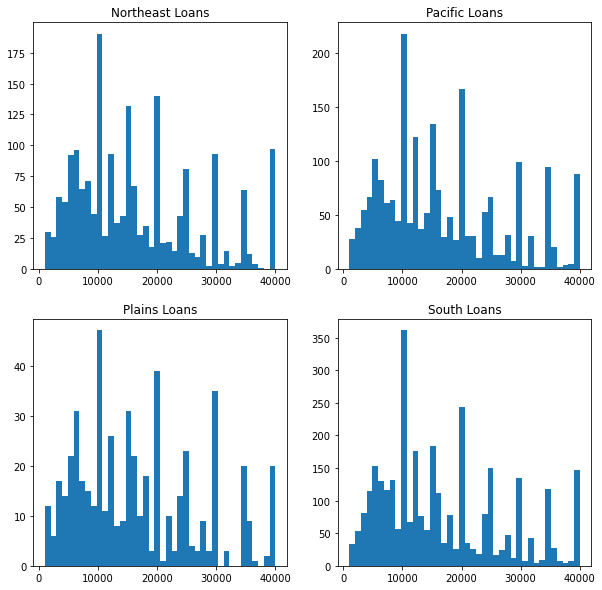

In [39]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(10,10)
axs[0, 0].hist(northeast_loan['loan_amount'],bins = 40)
axs[0, 0].set_title('Northeast Loans')
axs[0, 1].hist(pacific_loan['loan_amount'],bins = 40)
axs[0, 1].set_title('Pacific Loans')
axs[1, 0].hist(plains_loan['loan_amount'],bins = 40)
axs[1, 0].set_title('Plains Loans')
axs[1, 1].hist(south_loan['loan_amount'],bins = 40)
axs[1, 1].set_title('South Loans')




                               
plt.show()